In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv(r"S:\SUNNY PC\Elevate labs - 4 Months\Datasets\bank.csv")


In [7]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
df.shape


(11162, 17)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [12]:
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())



job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

In [13]:
X = df.drop("deposit", axis=1)
y = df["deposit"]


In [14]:
y = y.map({"no": 0, "yes": 1})


In [15]:
y.value_counts()


deposit
0    5873
1    5289
Name: count, dtype: int64

In [16]:
X.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


In [17]:
X.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [18]:
categorical_cols = X.select_dtypes(include="object").columns
categorical_cols


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [19]:
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


In [20]:
X.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3


In [21]:
X.dtypes


age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
dtype: object

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [23]:
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (8929, 16) (8929,)
Testing set: (2233, 16) (2233,)


In [24]:
dt_base = DecisionTreeClassifier(
    random_state=42
)

dt_base.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
train_pred = dt_base.predict(X_train)
test_pred = dt_base.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy :", test_acc)


Training Accuracy: 1.0
Testing Accuracy : 0.7823555754590238


In [26]:
depths = range(1, 11)

train_accs = []
test_accs = []

for d in depths:
    dt = DecisionTreeClassifier(
        max_depth=d,
        random_state=42
    )
    dt.fit(X_train, y_train)
    
    train_accs.append(accuracy_score(y_train, dt.predict(X_train)))
    test_accs.append(accuracy_score(y_test, dt.predict(X_test)))

for d, tr, te in zip(depths, train_accs, test_accs):
    print(f"Depth {d}: Train={tr:.3f}, Test={te:.3f}")


Depth 1: Train=0.715, Test=0.698
Depth 2: Train=0.715, Test=0.698
Depth 3: Train=0.776, Test=0.776
Depth 4: Train=0.779, Test=0.778
Depth 5: Train=0.814, Test=0.807
Depth 6: Train=0.830, Test=0.814
Depth 7: Train=0.841, Test=0.817
Depth 8: Train=0.854, Test=0.820
Depth 9: Train=0.873, Test=0.820
Depth 10: Train=0.887, Test=0.820


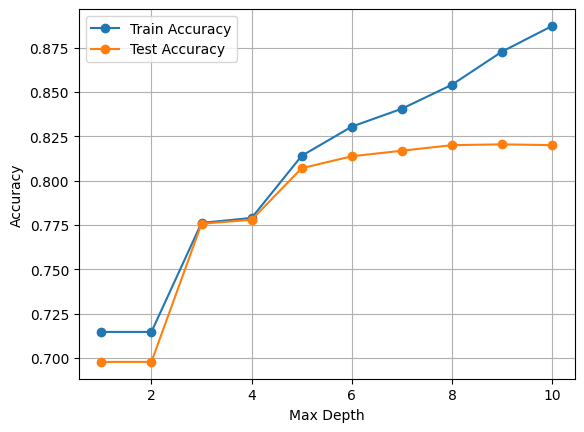

In [28]:
plt.plot(depths, train_accs, label="Train Accuracy", marker='o')
plt.plot(depths, test_accs, label="Test Accuracy", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [29]:
dt_final = DecisionTreeClassifier(
    max_depth=8,
    random_state=42
)

dt_final.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
y_pred = dt_final.predict(X_test)

print("Final Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Final Test Accuracy: 0.8199731303179579

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1175
           1       0.79      0.85      0.82      1058

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



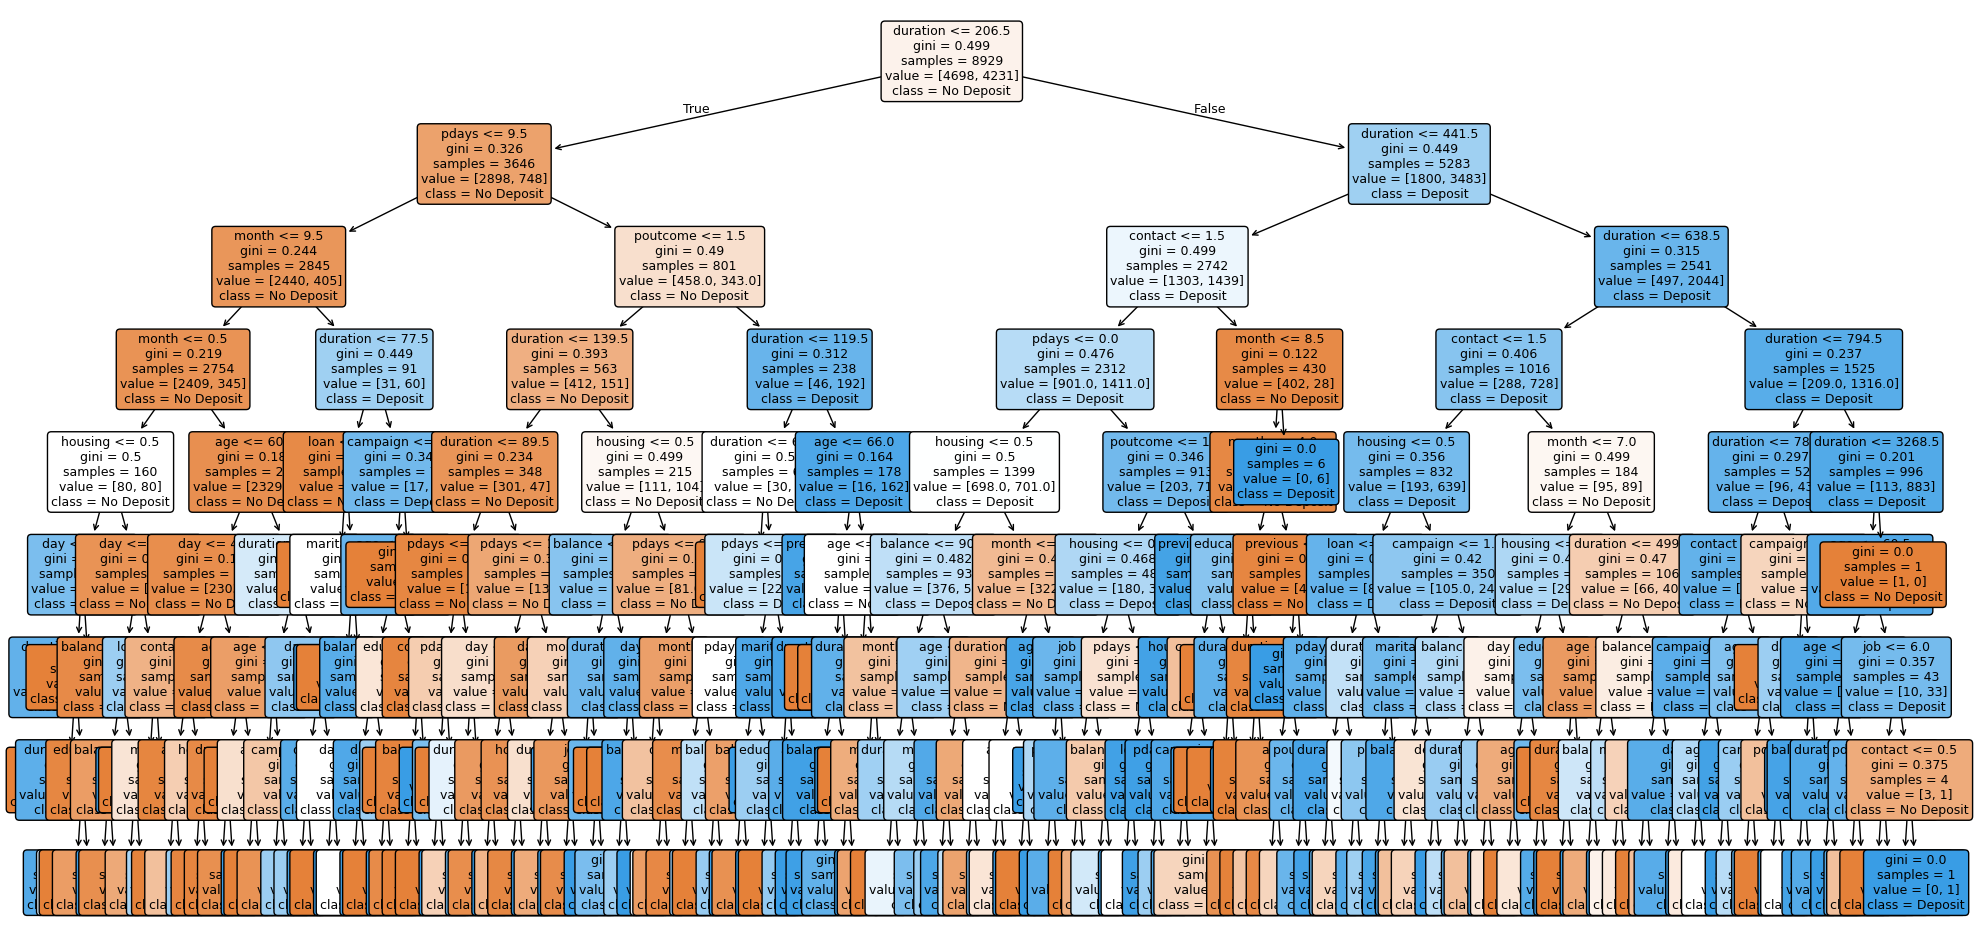

In [32]:
plt.figure(figsize=(24, 12))
plot_tree(
    dt_final,
    feature_names=X.columns,
    class_names=["No Deposit", "Deposit"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.show()
